# Polynomial Regression

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.set_style('whitegrid')

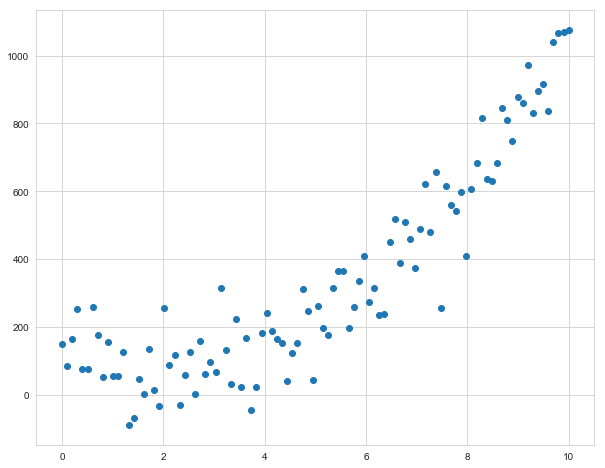

In [3]:
np.random.seed(42)
n_samples = 100

X = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y = X ** 3 + rng + 100

plt.figure(figsize=(10,8))
plt.scatter(X, y)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Linear Regression

0.7643394574930141


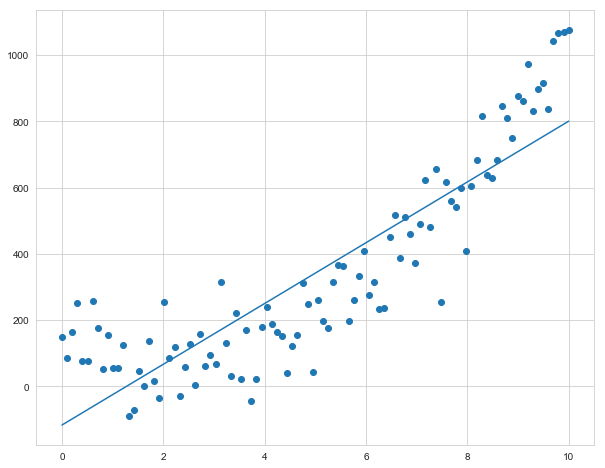

In [6]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
model_pred = lr.predict(X.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.plot(X, model_pred)
print(r2_score(y, model_pred))

# Polynomial

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

In [84]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)

0.9173858308909386


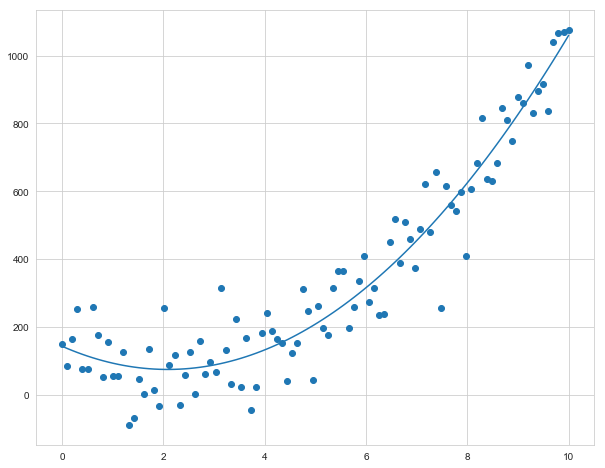

In [85]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.plot(X, y_pred)
print(r2_score(y, y_pred))

# Boston Housing Dataset

In [45]:
df_boston = pd.read_csv('housing.data', delim_whitespace=True, header=None)
df_boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# sns.pairplot(df_boston, height=1.5)

In [46]:
X_boston = df_boston['DIS'].values
y_boston = df_boston['NOX'].values

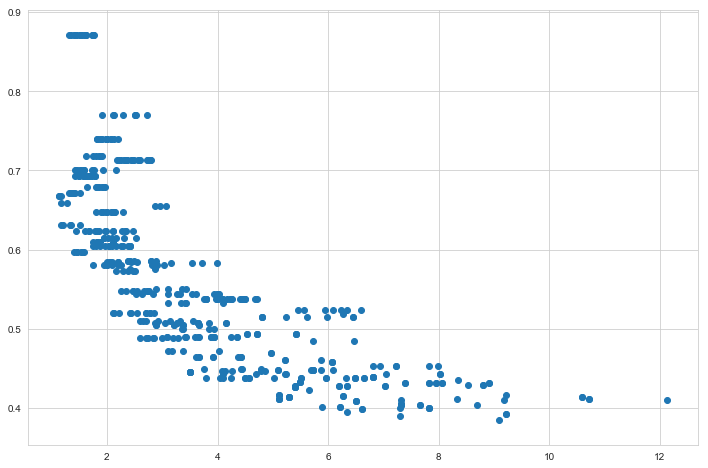

In [47]:
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston)

# Linear

R2 score = 0.59


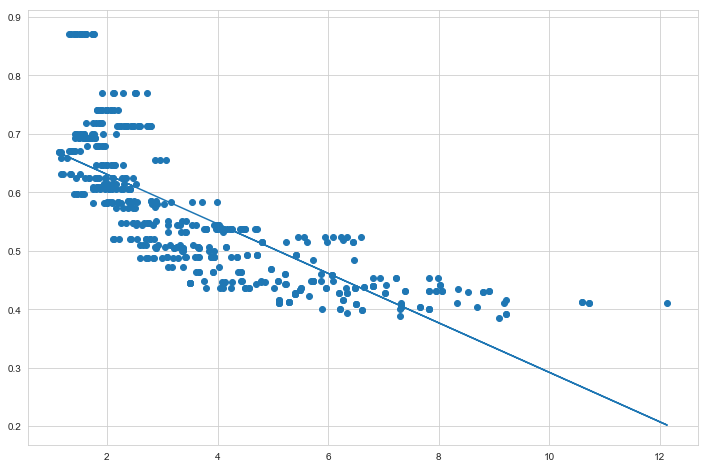

In [48]:
lr = LinearRegression()
lr.fit(X_boston.reshape(-1,1), y_boston)
model_pred = lr.predict(X_boston.reshape(-1,1))

plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston)
plt.plot(X_boston, model_pred)
print("R2 score = {:.2f}".format(r2_score(y_boston, model_pred)))

# Quadratic

In [49]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1,1))
lin_reg_2 = LinearRegression()

In [50]:
lin_reg_2.fit(X_poly_b, y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [52]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R2 score = 0.70


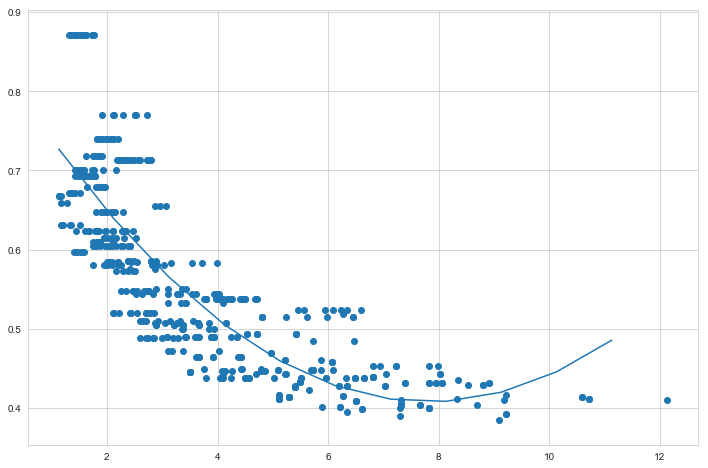

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston)
plt.plot(X_fit, y_pred)
print("R2 score = {:.2f}".format(r2_score(y_boston, lin_reg_2.predict(X_poly_b))))

# Cubic

In [69]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1,1))
lin_reg_3 = LinearRegression()

In [70]:
lin_reg_3.fit(X_poly_b, y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [72]:
y_pred = lin_reg_3.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R2 score = 0.71


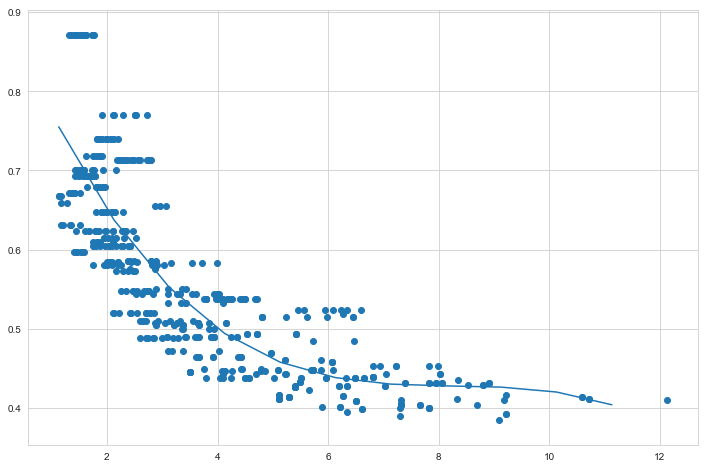

In [73]:
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston)
plt.plot(X_fit, y_pred)
print("R2 score = {:.2f}".format(r2_score(y_boston, lin_reg_3.predict(X_poly_b))))